<a href="https://colab.research.google.com/github/Kdavis2025/Projects/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 – Transactions




<center><h1> Business Case Problem </h1></center>
&nbsp;&nbsp;&nbsp;The organization seeks to optimize its marketing and operational strategies by predicting whether future customers will complete a transaction. Accurately forecasting transaction behavior allows the company to target high-potential customers, reduce wasted resources on the unlikely buyers, and ultimately drive revenue growth and cost savings.

<left><h3> Data Science Problem </h3></left>
&nbsp;&nbsp;&nbsp;This is a **supervised learning** problem. Historical transaction data, with anonymized input variables, includes a clearly defined outcome: whether a customer made a transaction. By labeling past transactions, we identified the target variable.</

<left><h5> *Target Determination* </h5></left>
&nbsp;&nbsp;&nbsp;The target was identified based on historical records indicating if a transaction occurred "yes/no".

<left><h5> *Target Description* </h5></left>
&nbsp;&nbsp;&nbsp;The target variable is **categorical** since it represents binary outcomes "transaction made vs. transaction not made".

<left><h3><b><i>Problem Definition</b></i> </h3></left>
&nbsp;&nbsp;&nbsp; Given the categorical nature of the target, this constitutes a **binary classification** problem rather than a regression task.
By employing **Gaussian Naive Bayes**, it assumes the predictors are normally distributed therefore, we can leverage the probabilistic framework to make informed predictions, even when input variables are anonymized and equally weighted.

<center><h2> Overview of the Data </h2></center>
The dataset contains 180,000 rows and 53 columns:

**Unnamed: 0:** This column appears to be a simple index generated when saving the file.

**ID_code:** A unique identifier for each transaction.

**target:** The binary target variable we wish to predict (typically 0/1).

**var_0 to var_49:** Fifty continuous features.

## Data Collection

In [1]:
from IPython.display import Image #Give our Jupyter Notebook the ability to show images.
import seaborn as sns # For visualizing distributions, categorical data, and relationships between variables.
import matplotlib.pyplot as plt #For plotting of graphs and charts to visually tell a story of data.
import numpy as np #For numerical operations.
import pandas as pd #For data manipulation with DataFrames.

from sklearn.model_selection import cross_val_score # Import cross_val_score
from sklearn import datasets, metrics, model_selection # Imports functionalities for working with datasets, evaluating models, and splitting data for traing and testing.
from sklearn.naive_bayes import GaussianNB # Imports GaussianNB Classifier for use.
from sklearn.model_selection import train_test_split # For splitting data into training and testing sets.
from sklearn.metrics import accuracy_score # For evaluating our models performance.

Lets assign our data to a path variable for manipulation.

In [2]:
base_path = 'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

Lets check to validate our path represents our data.

In [3]:
base_path

'https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.csv'

Now, we need to load our data into a dataframe.

In [4]:
original_data = pd.read_csv(base_path)

Next, we need to validate that our data frame loaded correctly by viewing the first 5 Rows for accuracy.

In [5]:
original_data.head()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,train_0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,1,train_1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,2,train_2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,3,train_3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,4,train_4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Respectively, we need to validate that our data frame loaded correctly by viewing the last 5 Rows for accuracy.

In [6]:
original_data.tail()

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
179995,179995,train_179995,0,8.9112,-4.4900,11.3795,5.4164,8.3309,14.1869,12.8219,...,5.9355,5.1764,-5.4817,20.7390,-0.8043,31.3663,8.7194,4.7839,0.9673,14.9529
179996,179996,train_179996,0,8.2722,7.1923,16.7300,4.9698,5.4907,14.0238,11.9933,...,5.3550,-1.5556,7.3839,9.9193,5.0860,28.0185,7.4145,4.2814,2.5575,15.3969
179997,179997,train_179997,0,12.4902,-2.9379,6.5901,4.7242,9.1423,13.9133,12.2314,...,6.0708,-0.3463,-5.0098,20.4807,5.9814,20.2668,3.1006,3.7701,0.1299,16.1256
179998,179998,train_179998,0,8.4894,0.7048,11.1518,4.6370,8.1321,14.2921,6.9582,...,5.5161,3.1774,-4.9374,23.6365,1.0432,29.9365,9.6381,6.9649,2.5546,15.6760
179999,179999,train_179999,0,11.6252,3.3959,11.5558,4.2003,7.4666,13.7381,12.9590,...,5.0415,-2.4210,-3.6829,14.2422,1.0741,26.3943,4.1482,11.9539,2.9846,15.6002


## Data Cleaning

**Caution:** Before doing any cleaning, let's make a copy of our data frame.

In [7]:
original_data_copy = original_data.copy()

Let's take a thorough look at the size and structure of our data.

In [8]:
original_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180000 entries, 0 to 179999
Data columns (total 53 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  180000 non-null  int64  
 1   ID_code     180000 non-null  object 
 2   target      180000 non-null  int64  
 3   var_0       180000 non-null  float64
 4   var_1       180000 non-null  float64
 5   var_2       180000 non-null  float64
 6   var_3       180000 non-null  float64
 7   var_4       180000 non-null  float64
 8   var_5       180000 non-null  float64
 9   var_6       180000 non-null  float64
 10  var_7       180000 non-null  float64
 11  var_8       180000 non-null  float64
 12  var_9       180000 non-null  float64
 13  var_10      180000 non-null  float64
 14  var_11      180000 non-null  float64
 15  var_12      180000 non-null  float64
 16  var_13      180000 non-null  float64
 17  var_14      180000 non-null  float64
 18  var_15      180000 non-null  float64
 19  va

**Note:** to quickly take a look at the size and structure of our data.

In [9]:
original_data_copy.shape

(180000, 53)

### **Important:** We must examine the columns within our data to isolate info that impacts our Gaussian-NB analysis.

Lets have a look at Column 'Unnamed: 0' to see if it contains useful info that impacts our analysis.

In [10]:
original_data_copy['Unnamed: 0'].unique()

array([     0,      1,      2, ..., 179997, 179998, 179999])

Next, we will have a look at Column 'ID_code' to see if it contains useful info that impacts our analysis.  

In [11]:
original_data_copy['ID_code'].unique()

array(['train_0', 'train_1', 'train_2', ..., 'train_179997',
       'train_179998', 'train_179999'], dtype=object)

Finally, we will have a Look at Column 'target' to see if it contains useful info that impacts our analysis

In [12]:
original_data_copy['target'].unique()

array([0, 1])

**Note:** To quickly look at all the Columns in our data to see if it contains info that impacts our analysis.

In [13]:
for var in original_data_copy.columns:
    print(var, original_data_copy[var].unique())

Unnamed: 0 [     0      1      2 ... 179997 179998 179999]
ID_code ['train_0' 'train_1' 'train_2' ... 'train_179997' 'train_179998'
 'train_179999']
target [0 1]
var_0 [ 8.9255 11.5006  8.6093 ...  6.0419  6.145  15.7964]
var_1 [-6.7863 -4.1473 -2.7457 ... -3.0079 -4.4768  7.1923]
var_2 [11.9081 13.8588 12.0805 ... 17.2377 16.73    6.5901]
var_3 [5.1187 5.6208 6.9427 ... 4.36   3.3854 7.69  ]
var_4 [ 5.747   8.0851  5.9525 ...  5.7632 10.2475  5.4907]
var_5 [14.0137 14.0239 14.1929 ... 14.4435 14.5587 14.4881]
var_6 [ 0.5745  8.4135  7.3124 ... 12.5927 12.2584 11.4228]
var_7 [ 4.284   7.8     4.7011 ... 29.0286 16.1962 16.0279]
var_8 [16.2191  2.7407 18.1377 ... 15.7685 29.9869  8.5698]
var_9 [ 2.5791  8.5524  1.2145 ...  8.9305  3.34   10.1279]
var_10 [ -5.1488 -11.7684  -7.994  ...  -0.6568  -0.3601   6.7832]
var_11 [16.8911 19.371  19.0422 ...  6.1809 21.7327  7.9943]
var_12 [11.192  11.3702 11.0449 ... 10.0939 12.7994 10.193 ]
var_13 [ -5.2387 -11.1147 -13.5174 ...   4.0349  -8.826

Lets **eliminate** columns that are not useful for our analysis. For example, we need to eliminate the 'Unamed: 0' and 'ID_code' columns.

In [14]:
original_data_copy.drop('ID_code', axis=1, inplace=True)
original_data_copy.drop('Unnamed: 0', axis=1, inplace=True)

Lets have a look at our data to verify that the above columns were removed.

In [15]:
original_data_copy.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,0,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,0,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,0,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,0,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


Next, lets check to make sure our data does not contain null values.

In [16]:
original_data_copy.isna()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
179998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Another way we can check.

In [17]:
original_data_copy.isna().sum()*1000

,0
target,0
var_0,0
var_1,0
var_2,0
var_3,0
var_4,0
var_5,0
var_6,0
var_7,0
var_8,0


Another quick way we can check for NAs.

In [18]:
original_data_copy.isnull().sum().sum()

0

**Important:** After we have identified which columns hold our target values we can quickly and directly check the 'target' column for NAs

In [19]:
original_data_copy['target'].isna().sum()*1000

0

### There are **0** NA values in our data.


**Note:** If there were null values in our data. We could:
1. Take a look at our columns to locate the nulls with:
    ***original_data_copy.isna().sum()***
2. Next, we can change the null values using:          
    ***original_data_copy.fillna()***
   and validate changes with:
    ***original_data_copy.info()***
3. Finally, we can drop the rows with nulls(NAs) with:
    ***original_data_copy.dropna(inplace = True)***

## Exploratory Data Analysis


**Important:** Before conducting an EDA lets first check our data for normal distrubution, then ouliers and finally correlations with the target.

Lets have a look at the distribution of our data. This allows us to validate the assumption of normal distribution and observe central tendency of the data, specifically **'target' std** which gives credibility to our GaussianNB analysis.

**Note:** Target Std Means needs to be approx 3.14159 for Normal Distribution of Gaussian-NB


In [20]:
original_data_copy.describe().transpose().style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
target,180000.000000,0.100222,0.300297,0.000000,0.000000,0.000000,0.000000,1.000000
var_0,180000.000000,10.678650,3.041036,0.408400,8.451675,10.526750,12.756200,20.315000
var_1,180000.000000,-1.630045,4.050519,-15.043400,-4.745600,-1.611250,1.360225,10.376800
var_2,180000.000000,10.712922,2.639146,2.117100,8.720000,10.579600,12.514100,19.353000
var_3,180000.000000,5.408688,0.866265,2.347300,4.768500,5.385600,6.003200,8.447700
var_4,180000.000000,7.566953,1.235043,3.970500,6.618800,7.628500,8.583800,11.150600
var_5,180000.000000,14.024017,0.190038,13.434600,13.893900,14.025500,14.164400,14.654500
var_6,180000.000000,8.528080,4.641700,-6.011100,5.065750,8.599200,12.273300,22.331500
var_7,180000.000000,15.243424,7.851050,-10.664200,9.170200,15.198900,21.010500,41.748000
var_8,180000.000000,17.264876,8.203204,-10.089000,11.552000,17.246850,23.100050,49.044300


Varify that std mean of feature var_0 are approx 3.14159 GNB

In [21]:
#target std means of var_0
original_data_copy['var_0'].std()

3.0410360456900896

**Feature Selection Techniques:** Depending on the relationships (via correlation analysis or statistical tests), some features might be dropped later if they show little to no variation or relevance.

Now lets analyze a sample feature (var_0) providing a clear visualization of the median,quartiles, and potential outliers (points that lie outside 1.5xIRC).

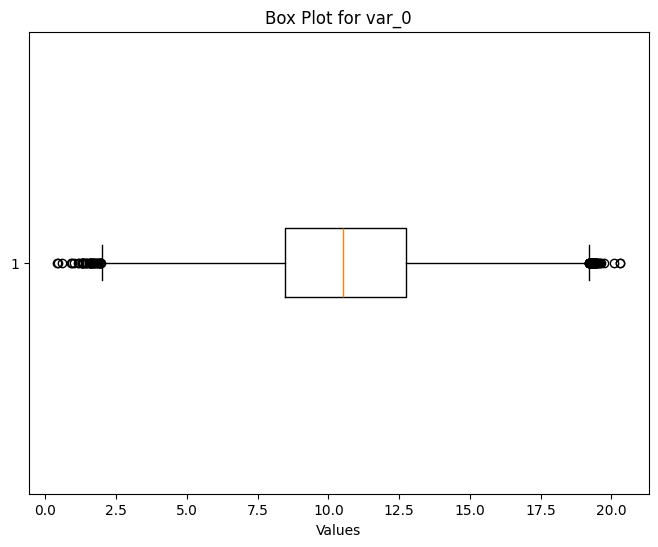

In [22]:
plt.figure(figsize=(8, 6))
plt.boxplot(original_data_copy['var_0'], vert=False)
plt.title('Box Plot for var_0')
plt.xlabel('Values')
plt.show()

Here is another way to visually represent our IQR for 'var_0'.



In [23]:
Q1 = original_data_copy['var_0'].quantile(0.25)
Q3 = original_data_copy['var_0'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

Here we will examine the outliers in 'var_0'.

In [24]:
outliers = original_data_copy[(original_data_copy['var_0'] < lower_bound) | (original_data_copy['var_0'] > upper_bound)]
print(f'Number of outliers in var_0: {len(outliers)}')

Number of outliers in var_0: 97


Isolate and remove outliers

In [25]:
outliers = original_data_copy[(original_data_copy['var_0'] < lower_bound) | (original_data_copy['var_0'] > upper_bound)]

A histogram for var_0 shows the overall distribution of the data, letting us see the shape and spread.

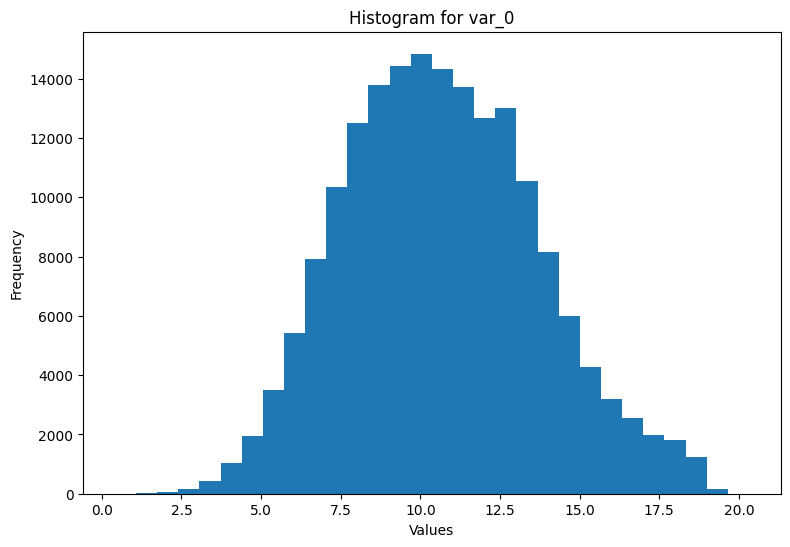

In [26]:
plt.figure(figsize=(9, 6))
plt.hist(original_data_copy['var_0'], bins=30)
plt.title('Histogram for var_0')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

 Let's examine how the features in 'var_0' relate to the target features. This is important for figuring out which features have the strongest relationship to target variable.

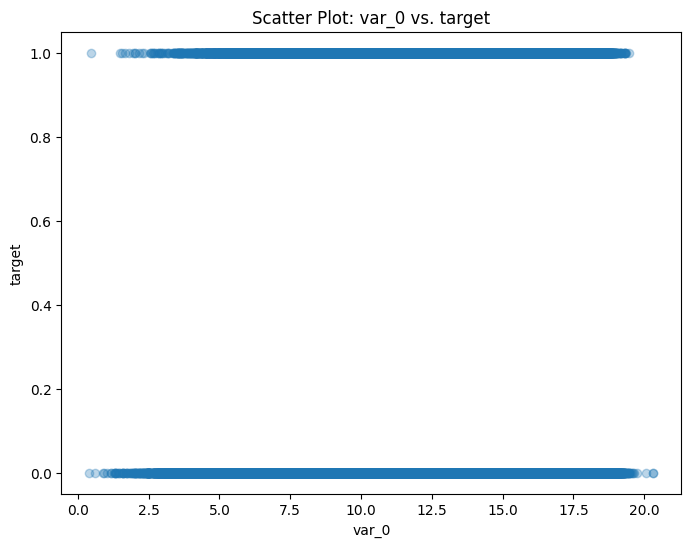

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(original_data_copy['var_0'], original_data_copy['target'], alpha=0.3)
plt.title('Scatter Plot: var_0 vs. target')
plt.xlabel('var_0')
plt.ylabel('target')
plt.show()

**Note:** By passing a data frame instead of a series, we can focus our pairplot and avoid analyzing 180000 values.

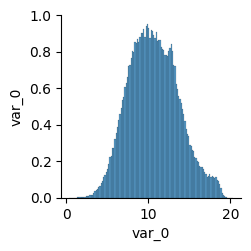

In [28]:
sns.pairplot(original_data_copy[['var_0']])
plt.show()

We can take a look at the correlation plot of our dataset.

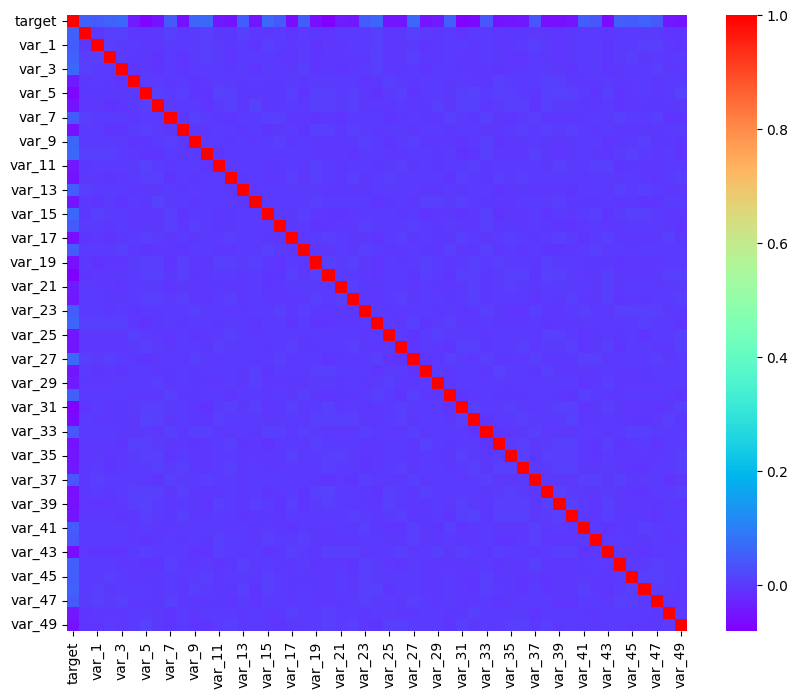

In [29]:
corr = original_data_copy.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='rainbow',annot = False);

To quickly identify correlations lets check the numbers.
**Note:** the closer the number to the target the stronger the correlation.

In [30]:
corr_matrix = original_data_copy.corr()

target_corr = corr_matrix['target'].sort_values(ascending=False)
print(target_corr)

target    1.000000
var_3     0.066924
var_27    0.064868
var_10    0.063565
var_15    0.062887
var_24    0.059306
var_9     0.059227
var_46    0.056902
var_2     0.055450
var_0     0.052904
var_30    0.052457
var_44    0.051110
var_1     0.049916
var_13    0.049072
var_18    0.048392
var_41    0.047948
var_23    0.047569
var_45    0.047543
var_47    0.045506
var_16    0.045281
var_7     0.044769
var_42    0.041593
var_33    0.040520
var_37    0.040147
var_21   -0.040311
var_29   -0.041987
var_4    -0.042073
var_48   -0.042765
var_36   -0.045513
var_11   -0.045516
var_22   -0.046433
var_25   -0.047005
var_35   -0.048198
var_14   -0.048623
var_28   -0.049551
var_40   -0.050049
var_26   -0.050278
var_49   -0.051718
var_12   -0.052324
var_34   -0.053733
var_6    -0.054375
var_38   -0.055704
var_19   -0.057320
var_39   -0.057373
var_8    -0.057378
var_17   -0.059906
var_43   -0.061291
var_32   -0.063871
var_5    -0.070015
var_31   -0.073296
var_20   -0.080689
Name: target, dtype: float64


Remove var_39 to reduce overlap in correlation and improve performance of our model.

In [31]:
target_corr = target_corr.drop('var_39')
target_corr

,target
target,1.000000
var_3,0.066924
var_27,0.064868
var_10,0.063565
var_15,0.062887
var_24,0.059306
var_9,0.059227
var_46,0.056902
var_2,0.055450
var_0,0.052904


Lets validate the integrity of the values in column 'target'

In [32]:
original_data_copy['target'].unique()

array([0, 1])

See how many observations there are for each unique value in the target column

In [33]:
original_data_copy['target'].value_counts()

,count
target,
0,161960
1,18040


## Processing

Database of successful transactions

In [34]:
success_transactions = original_data_copy[original_data_copy['target'] == 1]
success_transactions.drop('target', axis=1, inplace=True)
success_transactions.head()

<ipython-input-34-cc8dcc793dc2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_transactions.drop('target', axis=1, inplace=True)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
13,16.3699,1.5934,16.7395,4.8222,8.6978,13.7999,2.7925,14.3984,19.4258,1.6565,...,5.6656,3.5750,-2.2723,15.7383,8.5618,11.8982,7.4002,7.4031,4.3989,15.6064
29,5.3301,-2.6064,13.1913,5.9064,9.1168,14.0957,12.3335,1.6610,13.0446,4.3067,...,5.4183,8.6643,4.1428,4.7056,4.3694,16.4554,5.9215,7.9676,2.3405,17.4105
63,7.7072,0.0183,9.9974,6.0425,6.6710,14.0503,9.0144,-2.3445,23.5101,9.3373,...,6.0669,2.5841,2.2445,23.1283,2.9384,27.6213,1.5832,5.0039,3.8814,15.7685
65,10.5358,-2.5439,8.7394,5.1584,9.0358,13.6021,4.2864,13.8723,2.2106,3.9192,...,6.1149,2.2550,-7.2104,19.7545,6.3190,11.9410,4.6648,6.4227,3.4025,15.1340
71,6.7547,2.5973,14.2141,4.2336,9.1282,13.9394,3.6480,24.2658,33.3687,9.6420,...,5.0565,11.9429,0.3140,20.4828,7.9488,11.2587,1.4677,3.5935,2.0013,18.9013


Database of Failed Transactions

In [35]:
failed_transactions = original_data_copy[original_data_copy['target'] == 0]
failed_transactions.drop('target', axis=1, inplace=True)
failed_transactions.head()

<ipython-input-35-10ea0a4d4428>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_transactions.drop('target', axis=1, inplace=True)


,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49
0,8.9255,-6.7863,11.9081,5.1187,5.7470,14.0137,0.5745,4.2840,16.2191,2.5791,...,5.4879,-4.7645,3.1531,18.5618,1.7202,25.8398,4.4354,3.9642,3.1364,12.7803
1,11.5006,-4.1473,13.8588,5.6208,8.0851,14.0239,8.4135,7.8000,2.7407,8.5524,...,5.7999,5.5378,5.5134,30.2645,11.0752,22.5441,7.6421,7.7214,2.5837,18.3560
2,8.6093,-2.7457,12.0805,6.9427,5.9525,14.1929,7.3124,4.7011,18.1377,1.2145,...,5.7690,-7.0927,-5.8234,25.6820,2.4013,23.0866,2.9057,9.7905,1.6704,14.7222
3,11.0604,-2.1518,8.9522,5.8428,8.2450,13.8463,11.9704,15.9426,12.5579,6.8202,...,5.3430,-7.1541,11.7134,14.7483,5.6961,-0.4639,4.4666,4.7433,0.7178,17.9697
4,9.8369,-1.4834,12.8746,5.9405,7.6784,13.8481,7.8895,6.5263,18.9608,10.1102,...,5.5518,1.4493,2.3705,18.4685,5.1743,11.8503,-1.4905,9.5214,-0.1508,17.9974


# Unbalance Target Testing

Create predictor data frame by dropping non-predictive columns and making a copy

In [36]:
X = original_data_copy.drop(['target'], axis=1).copy()

Create target data frame (or series) as a copy

In [37]:
y = original_data_copy['target'].copy()

Initialize the Gaussian Naïve Bayes model

In [38]:
model_gnb = GaussianNB()

Split the data into training and testing subsets (80% train, 20% test)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the shapes of the splits for verification

In [40]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (144000, 50)
X_test shape: (36000, 50)
y_train shape: (144000,)
y_test shape: (36000,)


 Define and train the Gaussian Naïve Bayes model

In [41]:
model_gnb.fit(X_train, y_train)

GaussianNB()

Test the model on the testing subset and calculate Accuracy, Precision, Recall,F1-score, and Specificity.

In [42]:
y_pred = model_gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

print(f"Accuracy: %.2f, Precision: %.2f, Recall: %.2f, F1-score: %.2f, Specificity: %.2f" % (accuracy, precision, recall, f1, specificity))

Accuracy: 0.91, Precision: 0.66, Recall: 0.21, F1-score: 0.32, Specificity: 0.99


### Unbalanced Testing Results

Perform cross-validation (using 5 folds here) on the entire dataset

In [43]:
cv_scores = cross_val_score(model_gnb, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
mean_cv_accuracy = cv_scores.mean()
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)


Cross-Validation Accuracy Scores: [0.91097222 0.91011111 0.91133333 0.91097222 0.91263889]
Mean Cross-Validation Accuracy: 0.9112055555555555


Plot a histogram of the cross-validation accuracy score

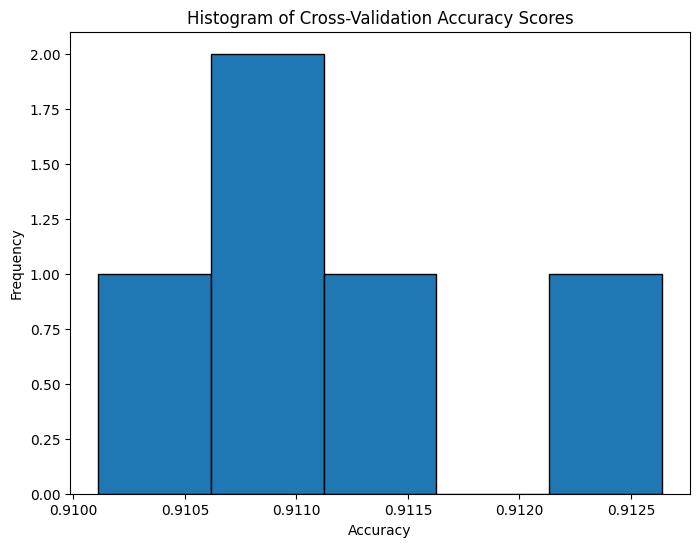

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(cv_scores, bins=5, edgecolor='black')
plt.title("Histogram of Cross-Validation Accuracy Scores")
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.show()

We observe a gap in CV score distribution in the Histogram from ~.76 to ~.77. The accuracy in the histogram is less than the accuracy calculated in the dataset.

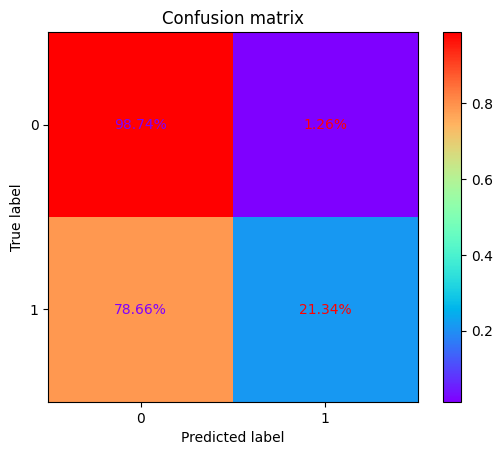

In [45]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model_gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'rainbow',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')


We can observe that our Confusion matrix of the **unbalanced test** gives us more in-depth information from the trained model rather than the accuracy of the model.

**Model Accuracy:** 0.91 or 91%, Precision: 0.66 or 66%, Recall: 0.21 or 21%, F1-score: 0.32 or 32%, Specificity: 0.99 or 99%

**Trained Model Accuracy:** .60 or 60%, Precision: .987 or 99%, Recall: .987 or 99%, F1-score: .987 or 99% , Specificity: .944 or 94%

# Balanced Target Testing

Separate successful and unsuccessful transactions

In [46]:
success_transactions = original_data_copy[original_data_copy['target'] == 1]
failed_transactions = original_data_copy[original_data_copy['target'] == 0]

Downsample unsuccessful transactions

In [47]:
balanced_failed_transactions = failed_transactions.sample(n=len(success_transactions), random_state=42)

Combine balanced datasets

In [48]:
balanced_data = pd.concat([balanced_failed_transactions, success_transactions])

Verify the dataset is balanced

In [49]:
print(balanced_data['target'].value_counts())

target
0    18040
1    18040
Name: count, dtype: int64


Create predictor data frame by dropping non-predictive columns and making a copy

In [50]:
X = balanced_data.drop(['target'], axis=1).copy()

Create target data frame (or series) as a copy

In [51]:
y = balanced_data['target'].copy()

Split the data into training and testing subsets (80% train, 20% test)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Display the shapes of the splits for verification

In [53]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (28864, 50)
X_test shape: (7216, 50)
y_train shape: (28864,)
y_test shape: (7216,)


Test the model on the testing subset and calculate Accuracy, Precision, Recall,F1-score, and Specificity.

In [54]:
model_gnb.fit(X_train, y_train)

y_pred = model_gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
specificity = metrics.recall_score(y_test, y_pred, pos_label=0)

print(f"Accuracy: %.2f, Precision: %.2f, Recall: %.2f, F1-score: %.2f, Specificity: %.2f" % (accuracy, precision, recall, f1, specificity))

Accuracy: 0.76, Precision: 0.77, Recall: 0.75, F1-score: 0.76, Specificity: 0.77


### Balanced Testing Results

Perform cross-validation (using 5 folds here) on the entire dataset

In [55]:
cv_scores = cross_val_score(model_gnb, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
mean_cv_accuracy = cv_scores.mean()
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

Cross-Validation Accuracy Scores: [0.75498891 0.75692905 0.75277162 0.75859202 0.77286585]
Mean Cross-Validation Accuracy: 0.759229490022173


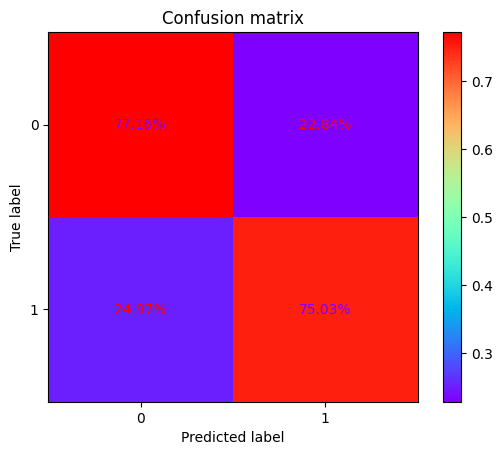

In [56]:
metrics.ConfusionMatrixDisplay.from_estimator(
    model_gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap = 'rainbow',
    )
plt.grid(False)
plt.title('Confusion matrix') ;
plt.savefig('confusion_matrix.png')

Here we can observe that our Confusion matrix of our **balanced test** gives us more in-depth information from the trained model rather than the accuracy of the model.

**Model Accuracy:** 0.76 or 76%, Precision: 0.77 or 77%, Recall: 0.75 or 75%, F1-score: 0.76 or 76%, Specificity: 0.77 or 77%

**Trained Model Accuracy:** 1.02 or 100%, Precision: .77 or 77%, Recall: .75 or 75%, F1-score: .76 or 76%, Specificity: .766 or 77%

# Data Visualization Results & Conclusion of Tests
What we can we deduce from our test findings? While evaluating the unbalanced datasets. The **Accuracy** of the test is *91%*. However, this is not the full picture. The **Recall** is the number of frauds we found over the number of frauds over the whole dataset. In this case, it is *21%*. The **precision** is the number of frauds correctly found over the total number of frauds in the dataset. In this case, it is *66%*. The **F1 Score** is the harmonic mean (variance) between the above measures, which is *32%* on the unbalanced dataset and *75%* on the balanced dataset. A *75%* F1 Score is solid for the performance of the test. The **objective** is to maximize the F1 Score by increased precision or recall, depending on the tests needs. The **tradeoff** is that improving one lowers the other and vice versa.

**To conclude**, our Gaussian-NB model for analysis was sufficient for conducting these tests. The tests revealed a variance of accuracy in the balanced and unbalanced data sets, showing that a balanced test of the target variable renders a more accurate performance result than an unbalanced or skewed test.

Also this model represents **Overfitting**, where the training accuracy is high and remains stable or even increases, while the validation accuracy is significantly lower than the training accuracy and may even decrease over time. This indicates that the model is memorizing the training data instead of learning the general patterns.
